In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Reshmi
[nltk_data]     Bar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
#IMPORTING LIBRARIES AND MODULES
import pandas as pd  #Data handling	
import numpy as np  

import seaborn as sns #Visualization
import matplotlib.pyplot as plt 

from bs4 import BeautifulSoup   # web scraping
from selenium import webdriver   
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import time    #Built-in Python module to add delays (wait for page to load etc.).
import requests #Makes simple HTTP requests (like calling a website URL and reading the HTML)
    
import nltk   #NLP (tokenize, clean)	
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob  #Sentiment analysis	
from wordcloud import WordCloud #generate the actual word cloud image.
# Start Chrome or Edge WebDriver 
driver = webdriver.Edge()  # or use webdriver.Edge() if preferred intialize selenium wedriver(opens Edge)

driver=webdriver.Edge()



In [9]:
# INITIALIZE LISTS TO STORE DATA 
#Create Empty List to store user data such as names,ratings,reviews and region
names = []
ratings = []
reviews = []
regions = []

# Flipkart URL
base_url = "https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZY7RHDU7&marketplace=FLIPKART"

# Add headers to mimic a browser (important for avoiding 403 errors)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36"
}

# Scrape Multiple Pages
for page in range(1, 20):  # you can go up to 20 if needed
    new_url = base_url + "&page=" + str(page)
    response = requests.get(new_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract Names
    name_tags = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for tag in name_tags:
        names.append(tag.text.strip())

    # Extract Ratings
    rating_tags = soup.find_all("div", {"class": "XQDdHH Ga3i8K"})
    for tag in rating_tags:
        ratings.append(tag.text.strip())

    # Extract Reviews
    review_tags = soup.find_all("div", {"class": "ZmyHeo"})
    for tag in review_tags:
        reviews.append(tag.text.strip())

    # Extract Region
    region_tags = soup.find_all("p", {"class": "MztJPv"})
    for tag in region_tags:
        regions.append(tag.text.strip())

print(len(names) ,  len(ratings) , len(reviews) , len(regions) )

190 190 190 190


In [10]:
# Create a dataframe for the extracted data ,putting the extracted data into a table using dataframe from pandas  
df = pd.DataFrame({"Customer Names" : names ,"Rating":ratings,"Review":reviews,"Region":regions})
df

,Customer Names,Rating,Review,Region
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,"Certified Buyer, Baleshwar"
1,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE,"Certified Buyer, Tikamgarh"
2,Ajin V,5,High quality camera😍READ MORE,"Certified Buyer, Balaghat"
3,Mousam Guha Roy,4,Very niceREAD MORE,"Certified Buyer, Matialihat"
4,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,"Certified Buyer, Meerut Division"
...,...,...,...,...
185,Adhitya Ramakrishnan,5,Everything is awesome! Great phone..READ MORE,"Certified Buyer, Mettupalayam Coimbatore District"
186,Gayatri Godara,5,If you aree happy...... if you are feeling goo...,"Certified Buyer, Pimpri Chinchwad"
187,Satyam Singh,5,Nice phoneREAD MORE,"Certified Buyer, Hyderabad"
188,Atul kumar Soni,5,This is the first time I've purchased iphone a...,"Certified Buyer, Rewa"


In [11]:
#start data cleaning and preprosssing Capitalizing the first letter of each word in Customer name
df ["Customer Names"] = df["Customer Names"].str.title()
df


,Customer Names,Rating,Review,Region
0,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,"Certified Buyer, Baleshwar"
1,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE,"Certified Buyer, Tikamgarh"
2,Ajin V,5,High quality camera😍READ MORE,"Certified Buyer, Balaghat"
3,Mousam Guha Roy,4,Very niceREAD MORE,"Certified Buyer, Matialihat"
4,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,"Certified Buyer, Meerut Division"
...,...,...,...,...
185,Adhitya Ramakrishnan,5,Everything is awesome! Great phone..READ MORE,"Certified Buyer, Mettupalayam Coimbatore District"
186,Gayatri Godara,5,If you aree happy...... if you are feeling goo...,"Certified Buyer, Pimpri Chinchwad"
187,Satyam Singh,5,Nice phoneREAD MORE,"Certified Buyer, Hyderabad"
188,Atul Kumar Soni,5,This is the first time I've purchased iphone a...,"Certified Buyer, Rewa"


In [13]:
#remove readmore in review and convert to Lower case

df["Review"] = df["Review"].str.replace("READ MORE", "").str.lower()
df

,Customer Names,Rating,Review,Region
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar"
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh"
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat"
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat"
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division"
...,...,...,...,...
185,Adhitya Ramakrishnan,5,everything is awesome! great phone..,"Certified Buyer, Mettupalayam Coimbatore District"
186,Gayatri Godara,5,if you aree happy...... if you are feeling goo...,"Certified Buyer, Pimpri Chinchwad"
187,Satyam Singh,5,nice phone,"Certified Buyer, Hyderabad"
188,Atul Kumar Soni,5,this is the first time i've purchased iphone a...,"Certified Buyer, Rewa"


In [14]:
#removing "Certificate Buyer and only stick with region name
df["Region"] = df["Region"].str.replace("Certificate Buyer, ", "").str.strip()
df

,Customer Names,Rating,Review,Region
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar"
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh"
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat"
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat"
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division"
...,...,...,...,...
185,Adhitya Ramakrishnan,5,everything is awesome! great phone..,"Certified Buyer, Mettupalayam Coimbatore District"
186,Gayatri Godara,5,if you aree happy...... if you are feeling goo...,"Certified Buyer, Pimpri Chinchwad"
187,Satyam Singh,5,nice phone,"Certified Buyer, Hyderabad"
188,Atul Kumar Soni,5,this is the first time i've purchased iphone a...,"Certified Buyer, Rewa"


In [15]:
#create review1 column 
df["Review_1"] = df["Review"].apply(sent_tokenize)  #splits a paragraph (review) into sentences.
df

,Customer Names,Rating,Review,Region,Review_1
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar",[just go for it.amazing one.beautiful camera w...
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh",[awesome 🔥🔥☺️]
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat",[high quality camera😍]
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat",[very nice]
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division",[switch from oneplus to iphone i am stunned wi...
...,...,...,...,...,...
185,Adhitya Ramakrishnan,5,everything is awesome! great phone..,"Certified Buyer, Mettupalayam Coimbatore District","[everything is awesome!, great phone..]"
186,Gayatri Godara,5,if you aree happy...... if you are feeling goo...,"Certified Buyer, Pimpri Chinchwad",[if you aree happy...... if you are feeling go...
187,Satyam Singh,5,nice phone,"Certified Buyer, Hyderabad",[nice phone]
188,Atul Kumar Soni,5,this is the first time i've purchased iphone a...,"Certified Buyer, Rewa",[this is the first time i've purchased iphone ...


In [27]:
#polarity check for Review_1
from textblob import TextBlob

def get_polarity(sentences):
    polarity_scores = []
    if isinstance(sentences, list):
        for sentence in sentences:
            blob = TextBlob(sentence)
            polarity_scores.append(blob.sentiment.polarity)
    return polarity_scores

df["Polarity"] = df["Review_1"].apply(get_polarity)
df.head(5)

,Customer Names,Rating,Review,Region,Review_1,Polarity,Avg_Polarity
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar",[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh",[awesome 🔥🔥☺️],[1.0],1.000000
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat",[high quality camera😍],[0.16],0.160000
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat",[very nice],[0.78],0.780000
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division",[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000


In [28]:
#get Avg_polarity
from textblob import TextBlob

# Function to calculate average polarity from a list of sentences
def get_avg_polarity(sentences):
    if isinstance(sentences, list) and sentences:
        polarities = [TextBlob(sentence).sentiment.polarity for sentence in sentences]
        return sum(polarities) / len(polarities)
    return 0  # Return neutral (0) if list is empty or invalid

# Apply the function to the Review_1 column
df["Avg_Polarity"] = df["Review_1"].apply(get_avg_polarity)
df.head(5)

,Customer Names,Rating,Review,Region,Review_1,Polarity,Avg_Polarity
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar",[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh",[awesome 🔥🔥☺️],[1.0],1.000000
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat",[high quality camera😍],[0.16],0.160000
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat",[very nice],[0.78],0.780000
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division",[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000


In [30]:
#sentiment of each review to classify them as either positive or negative.

#Extremly Positive , Positive ,Neutral ,Negtive , Extremaly Negative.
def sentiment(pol):
    if pol >= 0.75:
        return "Extremely Positive"
    elif pol > 0:
        return "Positive"
    elif pol == 0:
        return "Neutral"
    elif pol <= -0.75:
        return "Negative"
    else :
        return "Extremely Negative"
df["Sentiment"]=df["Avg_Polarity"].apply(sentiment)
df

,Customer Names,Rating,Review,Region,Review_1,Polarity,Avg_Polarity,Sentiment
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar",[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667,Positive
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh",[awesome 🔥🔥☺️],[1.0],1.000000,Extremely Positive
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat",[high quality camera😍],[0.16],0.160000,Positive
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat",[very nice],[0.78],0.780000,Extremely Positive
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division",[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000,Positive
...,...,...,...,...,...,...,...,...
185,Adhitya Ramakrishnan,5,everything is awesome! great phone..,"Certified Buyer, Mettupalayam Coimbatore District","[everything is awesome!, great phone..]","[1.0, 0.8]",0.900000,Extremely Positive
186,Gayatri Godara,5,if you aree happy...... if you are feeling goo...,"Certified Buyer, Pimpri Chinchwad",[if you aree happy...... if you are feeling go...,[0.8],0.800000,Extremely Positive
187,Satyam Singh,5,nice phone,"Certified Buyer, Hyderabad",[nice phone],[0.6],0.600000,Positive
188,Atul Kumar Soni,5,this is the first time i've purchased iphone a...,"Certified Buyer, Rewa",[this is the first time i've purchased iphone ...,[0.4715909090909091],0.471591,Positive


In [31]:
#average_mean
# The reviews are positive overall.iphone 128 GB
df['Avg_Polarity'].mean()

0.4776798274094327

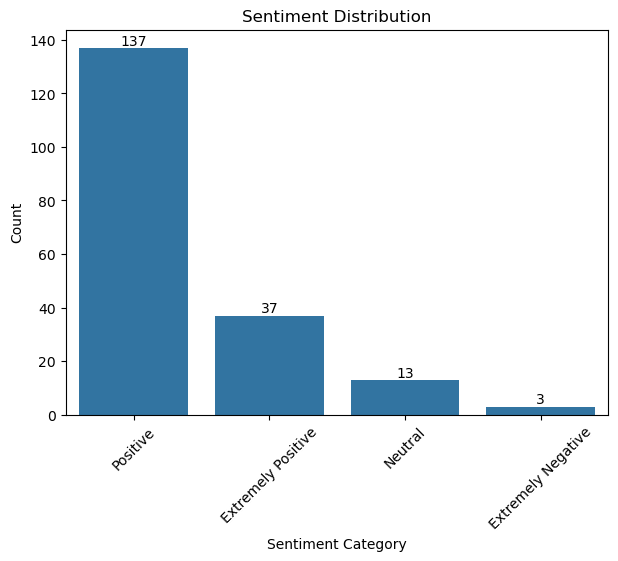

In [37]:
# Plot the sentiment distribution
plt.figure(figsize=(7, 5))
ax=sns.countplot(x= df["Sentiment"])
ax.bar_label(ax.containers[0])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#Insight: This will give you a sense of whether reviews skew more positive or negative.

In [43]:
# Ensure 'Rating' column is numeric (in case it contains strings)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Now calculate the average rating
average_rating = df['Rating'].mean()

# Print result with 2 decimal places
print(f"Average Rating: {average_rating:.2f}")

Average Rating: 4.82


In [44]:
average_rating_by_sentiment = df.groupby('Sentiment')['Rating'].mean().sort_values(ascending=False)
print(average_rating_by_sentiment)

Sentiment
Neutral               5.000000
Extremely Positive    4.945946
Positive              4.795620
Extremely Negative    3.666667
Name: Rating, dtype: float64


C:\Users\Reshmi Bar\AppData\Local\Temp\ipykernel_32852\972868694.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_sentiment.index, y=average_rating_by_sentiment.values, palette="viridis")


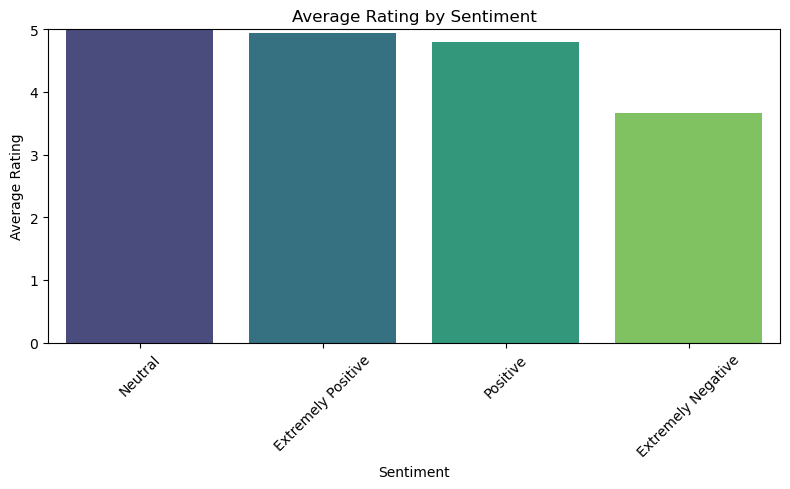

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=average_rating_by_sentiment.index, y=average_rating_by_sentiment.values, palette="viridis")
plt.title("Average Rating by Sentiment")
plt.ylabel("Average Rating")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Ratings range from 0 to 5
plt.tight_layout()
plt.show()

In [49]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


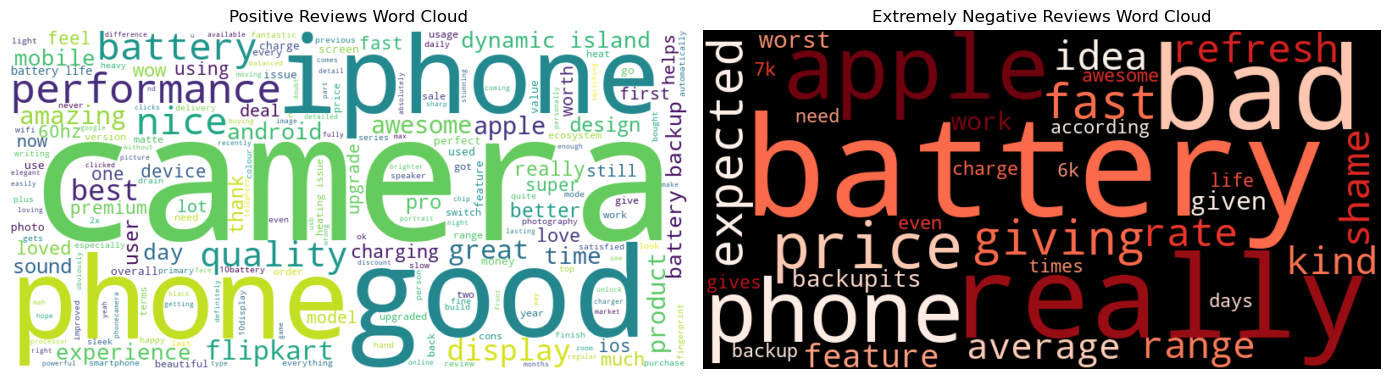

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Normalize sentiment labels
df['Sentiment'] = df['Sentiment'].str.lower().str.strip()

# Step 2: Extract text safely
positive_text = ' '.join(df[df['Sentiment'] == 'positive']['Review'].dropna())
extremely_negative_text = ' '.join(df[df['Sentiment'] == 'extremely negative']['Review'].dropna())

# Step 3: Generate word clouds only if text is available
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text) if positive_text.strip() else None
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(extremely_negative_text) if extremely_negative_text.strip() else None

# Step 4: Plot
plt.figure(figsize=(14, 6))

if wordcloud_pos:
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Positive Reviews Word Cloud')
    plt.axis('off')

if wordcloud_neg:
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Extremely Negative Reviews Word Cloud')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [54]:
#Review Length Analysis create a new column the number of words in review
df['Review_length'] = df['Review'].apply(lambda x: len(x.split()))
df.head(5)

,Customer Names,Rating,Review,Region,Review_1,Polarity,Avg_Polarity,Sentiment,Review_length
0,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar",[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667,positive,10
1,Rishabh Jha,5,awesome 🔥🔥☺️,"Certified Buyer, Tikamgarh",[awesome 🔥🔥☺️],[1.0],1.000000,extremely positive,2
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat",[high quality camera😍],[0.16],0.160000,positive,3
3,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat",[very nice],[0.78],0.780000,extremely positive,2
4,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division",[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000,positive,17


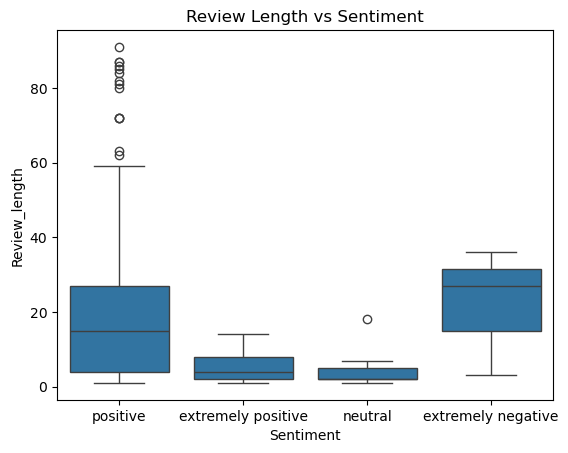

In [57]:
#Review Length Analysis
sns.boxplot(data=df, x='Sentiment', y='Review_length')
plt.title('Review Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel("Review_length")
plt.show()